In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [12]:
babylon_total_filename = 'All Babylonjs Data.csv'
pydriller_total_filename = 'All Pydriller Data.csv'
velocity_total_filename = 'All Velocity Data.csv'
toolkit_total_filename = 'All Toolkit Data.csv'
webgl_total_filename = 'All WebGL Data.csv'
threejs_total_filename = 'All Threejs Data.csv'

babylonData = pd.read_csv('Data/' + babylon_total_filename)
pydrillerData = pd.read_csv('Data/' + pydriller_total_filename)
threejsData = pd.read_csv('Data/' + threejs_total_filename)
webGLData = pd.read_csv('Data/' + webgl_total_filename)
velocityData = pd.read_csv('Data/' + velocity_total_filename)
toolkitData = pd.read_csv('Data/' + toolkit_total_filename)

df = pd.concat([pydrillerData, threejsData, webGLData, velocityData, toolkitData])
print(df.keys())

churn_labels = df['10x label churn']
commit_labels = df['10x label commits']

Index(['name', 'emails', '10x label churn', '10x label commits', 'churn',
       'num commits', 'first commit', 'last commit', 'churn productivity',
       'commit productivity', 'num owned files', 'sum of dmm complexities',
       'commits with dmm complexity present', 'num comments added/removed',
       'average dmm', 'average comments'],
      dtype='object')


For analysis we first performed simple linear regressions for a particular independent variable to address their correlation to 10x status (as stated in our research questions). We also did a simple multiple regression with the 10x engineer label as thedependent variable and average DMM unit complexity per commit, average number of comments added orremoved per commit, number of owned files, and tenure as the independent variables.  This regression would obviously allow us to examine the correlation between 10x engineers and average DMM unit complexity percommit, average number of comments added or removed per commit and number of owned files, but moreimportantly allow us to control the tenure variable to understand its affects on the 10x engineer label.

# RQ 1.  Examining the existence of the 10x engineers using churn the pro-ductivity metric

- productivity metric = $\frac{churn_{total}}{contributorTenure}$ 

- churn = $addedLines + removedLines$

- $contributorTenure$ = $\frac{1}{7}(date_{last commit} - date_{first commit})$

In [36]:
df

,name,emails,10x label churn,10x label commits,churn,num commits,first commit,last commit,churn productivity,commit productivity,num owned files,sum of dmm complexities,commits with dmm complexity present,num comments added/removed,average dmm,average comments
0,ishepard,['spadini.davide@gmail.com'],0,0,41195,808,2018-03-21 17:34:21,2020-05-28 17:03:54,361.359649,7.087719,564,236.519373,264,690,0.895907,0.853960
1,Spadini Davide,['spadini.davide@gmail.com'],0,0,6437,64,2018-04-24 13:49:57,2019-09-20 13:43:51,87.834308,0.873294,38,0.000000,0,0,0.000000,0.000000
2,Davide Spadini,['spadini.davide@gmail.com'],0,0,21159,242,2018-05-24 19:52:48,2021-10-29 16:26:28,118.206704,1.351955,224,18.730769,20,-14,0.936538,-0.057851
3,Ledenel,['ledenelintelli@gmail.com'],0,0,30,4,2018-08-02 05:11:07,2018-08-02 05:23:25,0.000000,0.000000,4,2.000000,2,0,1.000000,0.000000
4,Luca Pascarella,['luca.pascarella@gmail.com'],0,0,36,4,2018-11-28 15:51:39,2019-06-25 16:49:02,1.205742,0.133971,6,1.428571,2,0,0.714286,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Miles Johnson,['mileswjohnson@gmail.com'],0,0,1741950,3348,2011-10-25 14:58:48,2017-04-23 11:10:24,6078.589232,11.682951,7272,1200.556615,1358,1386,0.884062,0.413978
1,Chris Rebert,['code@rebertia.com'],0,0,16,2,2014-09-06 10:37:32,2014-09-06 10:37:32,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000
2,Michael White,['m@mwhite.info'],0,0,8,2,2014-12-14 18:49:32,2014-12-14 18:49:32,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000
3,Lucas Fernandes da Costa,['fernandesdacostalucas@gmail.com'],0,0,14,2,2015-01-08 10:51:11,2015-01-08 10:51:11,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000


In [39]:
df["10x label churn"].sum()

26

#  RQ 2.  Examining the correlation between code quality, signified by cyclo-matic complexity, and 10x engineers.

In [50]:
def simple_linear_regression(X, y):
    XX = X.to_numpy().reshape(-1, 1)
    ols = sm.OLS(y, X).fit()
    return ols, ols.summary()

                                 OLS Regression Results                                
Dep. Variable:        10x label churn   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.017
Method:                 Least Squares   F-statistic:                              29.31
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                    7.07e-08
Time:                        17:01:54   Log-Likelihood:                          1098.6
No. Observations:                1651   AIC:                                     -2195.
Df Residuals:                    1650   BIC:                                     -2190.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

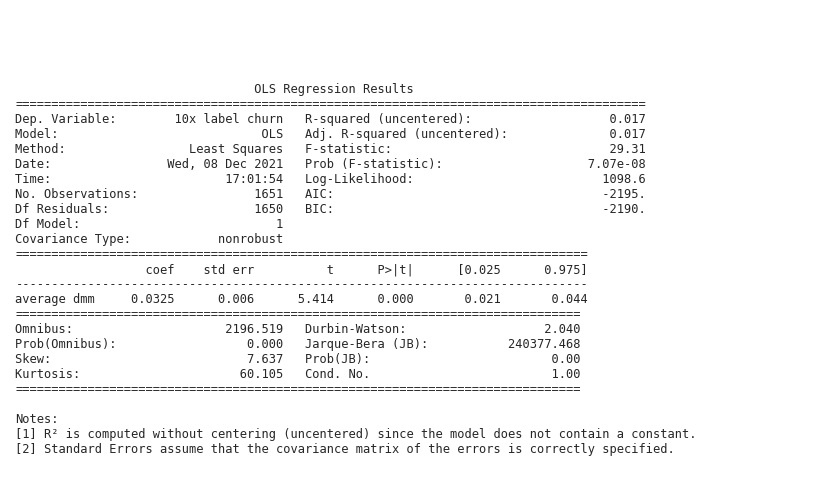

In [51]:
# Linear regression on cyclomatic complexity

X = df["average dmm"]
y = df["10x label churn"]
ols, summary = simple_linear_regression(X, y)
print(summary)

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(summary), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('outputs/output1.png')

#  RQ 3.  Examining the correlation between self descriptiveness, signified bynumber of comments, and 10x engineers.

                                 OLS Regression Results                                
Dep. Variable:        10x label churn   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              7.810
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                     0.00525
Time:                        17:01:55   Log-Likelihood:                          1087.9
No. Observations:                1651   AIC:                                     -2174.
Df Residuals:                    1650   BIC:                                     -2168.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

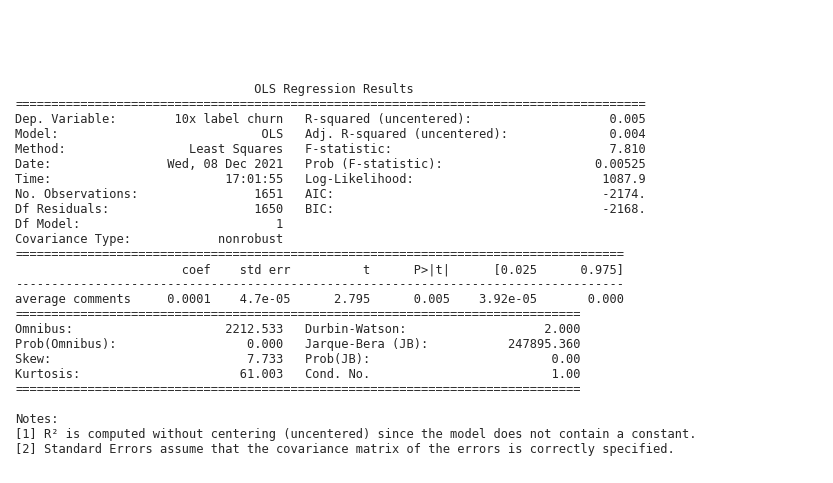

In [52]:
# Linear regression on self descriptiveness

X = df["average comments"]
y = df["10x label churn"]
ols, summary = simple_linear_regression(X, y)
print(summary)

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(summary), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('outputs/output2.png')

# RQ 4.  Examining the correlation between code ownership and 10x engi-neers.

                                 OLS Regression Results                                
Dep. Variable:        10x label churn   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.807
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                       0.179
Time:                        17:01:56   Log-Likelihood:                          1084.9
No. Observations:                1651   AIC:                                     -2168.
Df Residuals:                    1650   BIC:                                     -2162.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

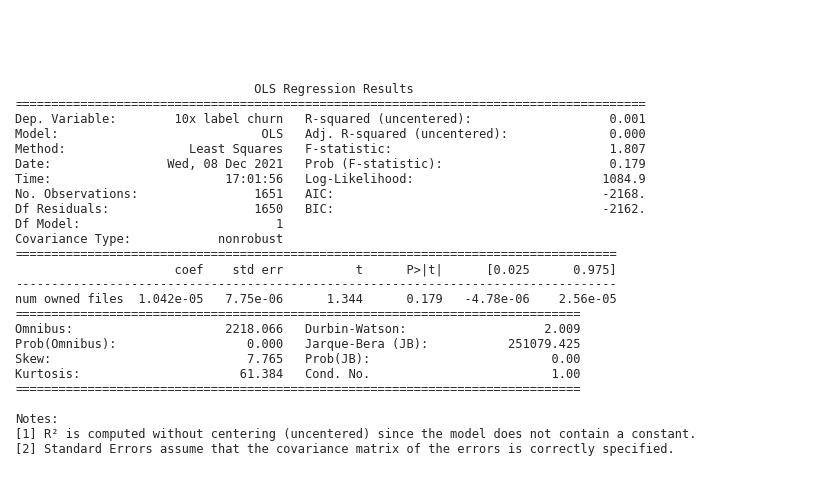

In [53]:
# Linear regression on ownership

X = df["num owned files"]
y = df["10x label churn"]
ols, summary = simple_linear_regression(X, y)
print(summary)

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(summary), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('outputs/output3.png')